In [1]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
# 데이터 가져오기
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [4]:
# 훈련 데이터 읽어 옴
data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
X = data_set[:, 0:16]
y = data_set[:, -1]

In [10]:
print(X.shape, y.shape)

(470, 16) (470,)


In [17]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=16,activation='relu'))  # 층(layer)을 추가 ,활성화함수->relu
model.add(Dense(1, activation='sigmoid'))  # 활성화 함수 -> sigmoid

# 모델 컴파일, 조건 ( 손실함수, 최적화, [정확도,손실율,..] )
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 
history = model.fit(X,y, epochs=10, batch_size=16)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 9.0417 - accuracy: 0.1511
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.7404
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.8511
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8468
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8511
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8511
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8511
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8511
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8511
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8511


In [16]:
history.history['accuracy'][-1]

0.8510638475418091

In [23]:
# 파이썬 코딩으로 확인하는 최소 제곱법
import numpy as np

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

mx = np.mean(x)  # x 평균
my = np.mean(y)  # y 평균

divisor = sum([ (i-mx) ** 2 for i in x ])  # (x- x평균)의 제곱 합

# (x-x평균)(y-y평균)의 합을 구함
divide = 0
for i in range(len(x)):
    divide += (x[i] - mx) * ( y[i] - my )
    
# 기울기 a -> (x-x평균)(y-y평균)/(x- x평균)의 제곱 합
a = divide / divisor
print('a -> ', a)

# 절편 b = y - ax 
b = my - (a * mx)

print('x의 평균 : ', mx, ' y의 평균 : ', my)
print("기울기 : ",a, "  절편 : ",b)

# 예측은?  공부 시간이 7시간이면 성적은?
print(" 공부 시간이 7시간인 경우 성적은 ? ", a*7 + b)


a ->  2.3
x의 평균 :  5.0  y의 평균 :  90.5
기울기 :  2.3   절편 :  79.0
 공부 시간이 7시간인 경우 성적은 ?  95.1


In [26]:
# 파이썬으로 확인하는 평균 제곱오차, 기울기와 절편을 임의로 결정하고 진행
fake_a = 3
fake_b = 76

# 예측값을 구함
predict_result = []
for i in range(len(x)):
    predict_result.append(x[i] * fake_a + fake_b)
print(y, predict_result)

# 실제값과 예측값의 차이의 제곱의 평균을 구함 : MSE
mse = sum((y - predict_result) **2) / len(y)
print("평균제곱오차 : ", mse)

[81 93 91 97] [82, 88, 94, 100]
평균제곱오차 :  11.0


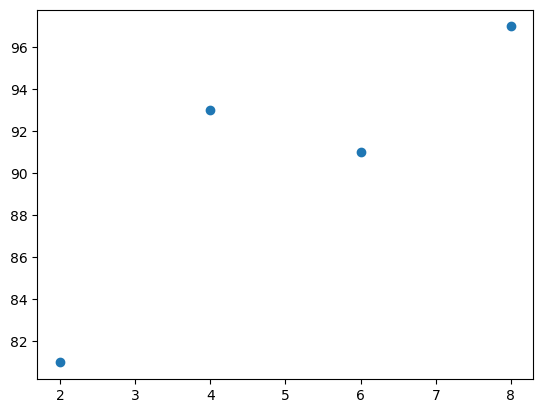

epoch : 0, 기울기=18.5600, 절편=3.6200
epoch : 100, 기울기=8.9416, 절편=39.3658
epoch : 200, 기울기=5.7649, 절편=58.3229
epoch : 300, 기울기=4.1076, 절편=68.2128
epoch : 400, 기울기=3.2430, 절편=73.3723
epoch : 500, 기울기=2.7920, 절편=76.0641
epoch : 600, 기울기=2.5567, 절편=77.4683
epoch : 700, 기울기=2.4339, 절편=78.2009
epoch : 800, 기울기=2.3699, 절편=78.5831
epoch : 900, 기울기=2.3364, 절편=78.7825
epoch : 1000, 기울기=2.3190, 절편=78.8865
epoch : 1100, 기울기=2.3099, 절편=78.9408
epoch : 1200, 기울기=2.3052, 절편=78.9691
epoch : 1300, 기울기=2.3027, 절편=78.9839
epoch : 1400, 기울기=2.3014, 절편=78.9916
epoch : 1500, 기울기=2.3007, 절편=78.9956
epoch : 1600, 기울기=2.3004, 절편=78.9977
epoch : 1700, 기울기=2.3002, 절편=78.9988
epoch : 1800, 기울기=2.3001, 절편=78.9994
epoch : 1900, 기울기=2.3001, 절편=78.9997
epoch : 2000, 기울기=2.3000, 절편=78.9998


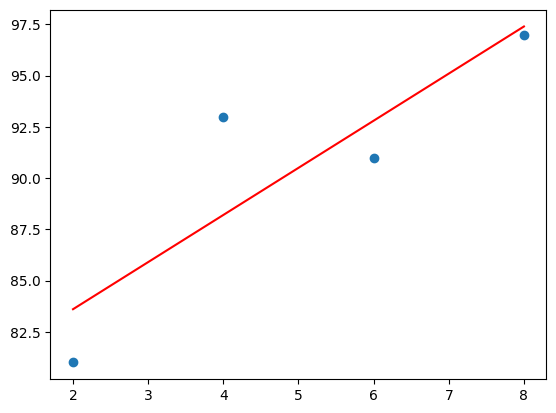

In [35]:
# 경사하강법을 이용한 선형회귀모델 실습
import matplotlib.pyplot as plt

# 공부시간 x와 성적 y의배열 생성

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

# 데이터를 그래프로 표현
plt.scatter(x,y)
plt.show()

# 기울기 a와 절편 b의 값을 초기화 시킴
a ,b = 0, 0
# 학습률 초기화
lr = 0.02
# 반복 회수 : 2000회
epochs = 2001

# 데이터의 갯수 n 
n = len(x)

# 경사하강법을 이용하여 기울기와 절편을 업데이트 하면서 반복 실행 ( epochs 만큼)
for i in  range(epochs):
    y_pred = a *x + b  # 예측값
    error = y - y_pred # 실제값과 에측값의 차이
    # print(y_pred, error)
    # 편미분값 구하기 a, b
    a_diff = (2/n) * sum( -x * (error) )
    b_diff = (2/n) * sum( -(error))
    
    a = a - lr * a_diff  # 다음 위치의 기울기
    b = b - lr * b_diff  # 다음 위치의 절편 
    if i % 100 == 0:
        print(f"epoch : {i}, 기울기={a:0.4f}, 절편={b:0.4f}")
# 최종 a와 b의 값으로 예측값 구함        
y_pred = a * x + b
    
# 그래프 출력 
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()

    

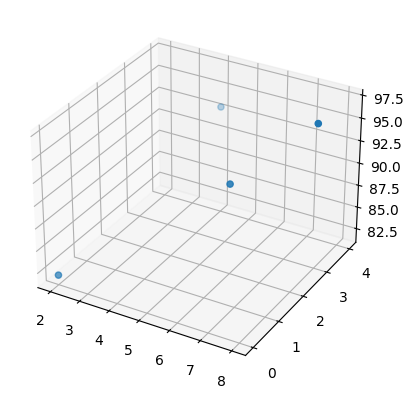

epoch : 0, 기울기1=9.2900, 기울기2=4.2250,절편=1.8150
epoch : 100, 기울기1=9.5389, 기울기2=4.8852,절편=23.2240
epoch : 200, 기울기1=7.3241, 기울기2=4.1340,절편=38.3942
epoch : 300, 기울기1=5.7158, 기울기2=3.5796,절편=49.4349
epoch : 400, 기울기1=4.5455, 기울기2=3.1755,절편=57.4701
epoch : 500, 기울기1=3.6937, 기울기2=2.8815,절편=63.3180
epoch : 600, 기울기1=3.0739, 기울기2=2.6674,절편=67.5740
epoch : 700, 기울기1=2.6228, 기울기2=2.5117,절편=70.6714
epoch : 800, 기울기1=2.2944, 기울기2=2.3983,절편=72.9256
epoch : 900, 기울기1=2.0555, 기울기2=2.3158,절편=74.5662
epoch : 1000, 기울기1=1.8816, 기울기2=2.2558,절편=75.7602
epoch : 1100, 기울기1=1.7550, 기울기2=2.2121,절편=76.6292
epoch : 1200, 기울기1=1.6629, 기울기2=2.1803,절편=77.2616
epoch : 1300, 기울기1=1.5959, 기울기2=2.1571,절편=77.7219
epoch : 1400, 기울기1=1.5471, 기울기2=2.1403,절편=78.0568
epoch : 1500, 기울기1=1.5116, 기울기2=2.1280,절편=78.3006
epoch : 1600, 기울기1=1.4858, 기울기2=2.1191,절편=78.4780
epoch : 1700, 기울기1=1.4669, 기울기2=2.1126,절편=78.6072
epoch : 1800, 기울기1=1.4533, 기울기2=2.1079,절편=78.7011
epoch : 1900, 기울기1=1.4433, 기울기2=2.1044,절편=78.7695
epoch : 2000,

In [40]:
# 다중 선형회귀 -> y = a1 * x1 + a2 * x2 + b, 독립변수가 여러개인 경우 
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([82,93,91,97])

# 3D 그래프로 표현
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x1,x2,y)
plt.show()

# 다중 선형회귀 
a1, a2, b = 0, 0, 0
lr = 0.01
for i in  range(epochs):
    y_pred = a1 *x1 + a2* x2 + b  # 예측값
    error = y - y_pred # 실제값과 에측값의 차이
    # print(y_pred, error)
    # 편미분값 구하기 a, b
    a1_diff = (2/n) * sum( -x1 * (error) )
    a2_diff = (2/n) * sum( -x2 * (error) )    
    b_diff = (2/n) * sum( -(error))
    
    a1 = a1 - lr * a1_diff  # 다음 위치의 기울기
    a2 = a2 - lr * a2_diff  # 다음 위치의 기울기    
    b = b - lr * b_diff  # 다음 위치의 절편 
    if i % 100 == 0:
        print(f"epoch : {i}, 기울기1={a1:0.4f}, 기울기2={a2:0.4f},절편={b:0.4f}")
# 최종 a와 b의 값으로 예측값 구함        
y_pred = a1 *x1 + a2* x2 + b
print("실제 점수 : ", y)
print("예측 점수 : ", y_pred)
